# A\B test final project
By MICHAEL BIRMAN

## Task
You've received an analytical task from an international online store. Your predecessor failed to complete it: they launched an A/B test and then quit (to start a watermelon farm in Brazil). They left only the technical specifications and the test results.
Technical description:
- Test name: recommender_system_test
- Groups: А (control), B (new payment funnel)
- Launch date: 2020-12-07
- Date when they stopped taking up new users: 2020-12-21
- End date: 2021-01-01
- Audience: 15% of the new users from the EU region
- Purpose of the test: testing changes related to the introduction of an improved recommendation system
- Expected result: within 14 days of signing up, users will show better conversion into product page views (the product_page event), instances of adding items to the shopping cart (product_cart), and purchases (purchase). At each stage of the funnel product_page → product_cart → purchase, there will be at least a 10% increase.
- Expected number of test participants: 6000
## Instructions for completing the task
### Describe the goals of the study.
#### Explore the data:
      Do types need to be converted?
      Are there any missing or duplicate values? If so, how would you characterize them?
#### Carry out exploratory data analysis:
       Study conversion at different stages of the funnel.
       Is the number of events per user distributed equally among the samples?
       Are there users who are present in both samples?
       How is the number of events distributed among days?
       Are there any peculiarities in the data that you have to take into account before starting the A/B test?
#### Evaluate the A/B test results:
       What can you say about the A/B test results?
       Use a z-test to check the statistical difference between the proportions.
       Describe your conclusions regarding the EDA stage and the A/B test results.


In [400]:
import pandas as pd
import numpy as np
from IPython import display

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go

import scipy.stats as st
import math

In [401]:
try:
    final_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv', sep= ',')
    new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv',sep= ',')
    events = pd.read_csv('/datasets/final_ab_events_upd_us.csv',sep= ',')
    p_m_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv',sep= ',')
    
except:
    final_participants = pd.read_csv('C:/Users/Admin/Desktop/practicum/final_project/ab_test/final_ab_participants_upd_us.csv',sep= ',')
    new_users = pd.read_csv('C:/Users/Admin/Desktop/practicum/final_project/ab_test/final_ab_new_users_upd_us.csv',sep= ',')
    events = pd.read_csv('C:/Users/Admin/Desktop/practicum/final_project/ab_test/final_ab_events_upd_us.csv',sep= ',')
    p_m_events = pd.read_csv('C:/Users/Admin/Desktop/practicum/final_project/ab_test/ab_project_marketing_events_us.csv',sep= ',')

In [402]:
final_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [403]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [404]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [405]:
p_m_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [406]:
list_of_data = [final_participants, new_users, events, p_m_events]
list_of_names = ['data_final_participants', 'data_new_users', 'data_events', 'data_p_m_events']

for data, names in zip(list_of_data, list_of_names):
    print()
    print(names)
    print()
    print(data.info())
    print()
    print(data.describe())


data_final_participants

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     307C06C0E6F09B93      A  interface_eu_test
freq                   2   8214              10850

data_new_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: objec

1. final_particularpants. 
* no missing date.
* many repetitions in user_id, check.
2. new_users 
* change first_date column type to datetime
* top first_day - 12/10/2020
* top region EU
* top device - Android
3. events:
* event_dt to datetime
* details - a lot off missing data
* details - a lot of outleiters 
4. p_m_events:
* start_dt and finish_dt to datetime

data type replacement in columns over time.

In [407]:
dataframes = [new_users, events, p_m_events]
columns = ['first_date', 'event_dt', 'start_dt', 'finish_dt']

In [408]:
def convert_to_datetime(dataframes, columns):
    for df in dataframes:
        for col in columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col])

In [409]:
convert_to_datetime(dataframes, columns)

In [410]:
for df in dataframes:
    print(df.dtypes)

user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object
name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object


# EVENTS

In [411]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


check the unique values of the event_name and details columns

In [412]:
events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

only 4 values, with a large variation. it is possible that they occur only in the fields with purchase from the event_name column. let's check

In [413]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [414]:
num_purchase_details = len(events[events['event_name'] == 'purchase']['details'])
num_purchase_details

60314

60314, exactly as much as there is total filled data in the details column, we can say for sure that this only applies to customers who have made a purchase. This will be an important factor for further evaluation of the funnels.

In [415]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


filtered by actual test dates

In [416]:
events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d %H:%M:%S')

In [417]:
start_date = '2020-12-07'
end_date = '2021-01-01'
actual_events = events[(events['event_dt'] >= start_date) & (events['event_dt'] <= end_date)]
actual_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 16.2+ MB


In [418]:
actual_events['event_dt'].describe()

count                  423761
unique                 257138
top       2020-12-14 18:54:55
freq                       10
first     2020-12-07 00:00:33
last      2020-12-30 23:36:33
Name: event_dt, dtype: object

# final_participants

In [419]:
final_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [420]:
final_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [421]:
final_participants.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,307C06C0E6F09B93,A,interface_eu_test
freq,2,8214,10850


In [422]:
final_participants['group'].value_counts()

A    8214
B    6311
Name: group, dtype: int64

In [423]:
final_participants['ab_test'].value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

We also remember that while reviewing the data, we found that another A/B test was conducted. Unfortunately, we don't have data on the date it was conducted. But it is possible that some users took part in both tests, and if their dates overlapped, that could also affect the resulting metrics. Accordingly, we should leave users who participated in only one A/B-test.

In [424]:
# Find users who participate in both events
both_tests_users = final_participants.groupby('user_id')['ab_test'].nunique()
both_tests_users = both_tests_users[both_tests_users == 2].index

# Exclude users who participate in both events
final_participants = final_participants[~final_participants['user_id'].isin(both_tests_users)]

In [425]:
len(final_participants)

12751

In [426]:
final_participants['ab_test'].value_counts()

interface_eu_test          9963
recommender_system_test    2788
Name: ab_test, dtype: int64

Only 2,788 participants participate in the recommender_system_test we need, some of them probably participate in both groups. let's check. 

In [427]:
both_groups = final_participants[final_participants['ab_test'] == 'recommender_system_test'].groupby('user_id', group_keys=False).filter(lambda x: len(x) > 1)
num_both_groups = len(both_groups['user_id'].unique())
num_both_groups

0

OK, judging by the results, there are no users who took part in both groups in the test we want.
    

 Let's take only those participants we are interested in

In [428]:
actual_participants = final_participants.query("ab_test == 'recommender_system_test'")
actual_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test


In [429]:
actual_participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 3674
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2788 non-null   object
 1   group    2788 non-null   object
 2   ab_test  2788 non-null   object
dtypes: object(3)
memory usage: 87.1+ KB


In [430]:
actual_participants['group'].value_counts()

A    2082
B     706
Name: group, dtype: int64

make a selection of participants in the second test and conduct the same research.

In [431]:
interface = final_participants.query("ab_test == 'interface_eu_test'")
interface.head()

,user_id,group,ab_test
3675,D4E530F6595A05A3,A,interface_eu_test
3676,6BCB0F33D3BAB8C2,A,interface_eu_test
3678,2D2E7AA539CF348F,B,interface_eu_test
3679,4BA448BCE1343C6F,A,interface_eu_test
3680,76B6CDF2A8B1DBFC,B,interface_eu_test


In [432]:
interface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9963 entries, 3675 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  9963 non-null   object
 1   group    9963 non-null   object
 2   ab_test  9963 non-null   object
dtypes: object(3)
memory usage: 311.3+ KB


In [433]:
interface['group'].value_counts()

A    5011
B    4952
Name: group, dtype: int64

it is very likely that a mistake was made in the documentation and the names of the tests were mixed up. If it had been possible to talk to the team, then we would have been able to choose the right test for analysis, but this is not possible now. Therefore we will analyze both tests, understanding that both of them must be treated with suspicion. 

# p_m_events

In [434]:
p_m_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


# new_users

In [435]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [436]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [437]:
new_users['first_date'].sort_values().unique()

array(['2020-12-07T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-09T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-11T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-13T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-20T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000'], dtype='datetime64[ns]')

We will only take those who are earlier than December 21

In [438]:
new_users_actual = new_users[(new_users['first_date']<='2020-12-21')]
new_users_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53440 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     53440 non-null  object        
 1   first_date  53440 non-null  datetime64[ns]
 2   region      53440 non-null  object        
 3   device      53440 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.0+ MB


combine the tables for further analysis

In [439]:
ab_test = (actual_participants
                      .merge(actual_events, on='user_id', how='left')
                      .merge(new_users_actual, on='user_id', how='left')
                      .reset_index(drop=True)
                 )
ab_test.head()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone


In [440]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18194 non-null  object        
 1   group       18194 non-null  object        
 2   ab_test     18194 non-null  object        
 3   event_dt    18194 non-null  datetime64[ns]
 4   event_name  18194 non-null  object        
 5   details     2390 non-null   float64       
 6   first_date  18194 non-null  datetime64[ns]
 7   region      18194 non-null  object        
 8   device      18194 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.2+ MB


Let's make a joint table for the second test.

In [441]:
ab_test_interface = (interface
                      .merge(actual_events, on='user_id', how='left')
                      .merge(new_users_actual, on='user_id', how='left')
                      .reset_index(drop=True)
                 )
ab_test_interface.head()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:01:01,product_cart,NaN,NaT,NaN,NaN
1,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,product_cart,NaN,NaT,NaN,NaN
2,D4E530F6595A05A3,A,interface_eu_test,2020-12-29 23:35:45,product_cart,NaN,NaT,NaN,NaN
3,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:00:57,login,NaN,NaT,NaN,NaN
4,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,login,NaN,NaT,NaN,NaN


#### AB TEST RECOMENDATED

In [442]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18194 non-null  object        
 1   group       18194 non-null  object        
 2   ab_test     18194 non-null  object        
 3   event_dt    18194 non-null  datetime64[ns]
 4   event_name  18194 non-null  object        
 5   details     2390 non-null   float64       
 6   first_date  18194 non-null  datetime64[ns]
 7   region      18194 non-null  object        
 8   device      18194 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.2+ MB


Let's check and leave only those users whose actions took place later or on the date of the first login to the site.

In [443]:
ab_test = ab_test[ab_test['event_dt'] > ab_test['first_date']]

In [444]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18194 entries, 0 to 18193
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18194 non-null  object        
 1   group       18194 non-null  object        
 2   ab_test     18194 non-null  object        
 3   event_dt    18194 non-null  datetime64[ns]
 4   event_name  18194 non-null  object        
 5   details     2390 non-null   float64       
 6   first_date  18194 non-null  datetime64[ns]
 7   region      18194 non-null  object        
 8   device      18194 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.4+ MB


We also need to add information about what marketing campaigns were conducted during the period in question (and whether they were conducted at all).

In [445]:
ab_test['marketing_event'] = 'no events'

In [446]:
def get_event(row):
    start_dates = p_m_events['start_dt']
    end_dates = p_m_events['finish_dt']
    regions = p_m_events['regions'].apply(lambda x: x.split(', '))
    for i in range(len(p_m_events)):
        if start_dates[i] <= row['event_dt'] <= end_dates[i] and row['region'] in regions[i]:
            return p_m_events['name'][i]
    return 'no events'

ab_test['marketing_event'] = ab_test.apply(get_event, axis=1)

In [447]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18194 entries, 0 to 18193
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          18194 non-null  object        
 1   group            18194 non-null  object        
 2   ab_test          18194 non-null  object        
 3   event_dt         18194 non-null  datetime64[ns]
 4   event_name       18194 non-null  object        
 5   details          2390 non-null   float64       
 6   first_date       18194 non-null  datetime64[ns]
 7   region           18194 non-null  object        
 8   device           18194 non-null  object        
 9   marketing_event  18194 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 1.5+ MB


In [191]:
ab_test['marketing_event'].unique()

array(['no events', 'Christmas&New Year Promo'], dtype=object)

we see that there is one Christmas&New Year Promo event for the specified deadline, it may affect the test result, so let's remove those involved in this event as well

In [448]:
ab_test = ab_test.loc[ab_test['marketing_event'] != 'Christmas&New Year Promo']

In [449]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 0 to 18193
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          16345 non-null  object        
 1   group            16345 non-null  object        
 2   ab_test          16345 non-null  object        
 3   event_dt         16345 non-null  datetime64[ns]
 4   event_name       16345 non-null  object        
 5   details          2141 non-null   float64       
 6   first_date       16345 non-null  datetime64[ns]
 7   region           16345 non-null  object        
 8   device           16345 non-null  object        
 9   marketing_event  16345 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 1.4+ MB


We will leave only those about whom the details are known, because it is on them that we will do the research.

In [450]:
ab_test.isna().sum()

user_id                0
group                  0
ab_test                0
event_dt               0
event_name             0
details            14204
first_date             0
region                 0
device                 0
marketing_event        0
dtype: int64

In [451]:
ab_test.head()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,marketing_event
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC,no events
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC,no events
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC,no events
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC,no events
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone,no events


Choose only those who performed actions according to the condition of the test

In [452]:
ab_test['days_since_registration'] = (ab_test['event_dt'] - ab_test['first_date']).dt.days

In [453]:
ab_test = ab_test[ab_test['days_since_registration'] <= 14]
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16221 entries, 0 to 18193
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  16221 non-null  object        
 1   group                    16221 non-null  object        
 2   ab_test                  16221 non-null  object        
 3   event_dt                 16221 non-null  datetime64[ns]
 4   event_name               16221 non-null  object        
 5   details                  2127 non-null   float64       
 6   first_date               16221 non-null  datetime64[ns]
 7   region                   16221 non-null  object        
 8   device                   16221 non-null  object        
 9   marketing_event          16221 non-null  object        
 10  days_since_registration  16221 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 1.5+ MB


## building and analyzing funnels

In [454]:
# Функция для формирования таблицы
def event_group_pivot(group):
    result = (ab_test
                  .query('group == @group')
                  .groupby('event_name')
                  .agg({'user_id':'nunique'})
                  .reset_index()
                  .sort_values(by='user_id', ascending=False)
                  .reset_index(drop=True)
             )
    return result

def event_group_ratio(df):
    df['ratio'] = round((df['user_id'] / len(ab_test['user_id'].unique())),3)
    df['success'] = df['user_id'].shift(periods=1, axis=0, fill_value=df['user_id'][0])
    df['conv'] = round((df['user_id'] / df['success']),3)
# Таблица для группы A
event_A_pivot = event_group_pivot('A')
event_group_ratio(event_A_pivot)
event_A_pivot.columns = ['event_name', 'A', 'A_ratio', 'A_success', 'A_conv']
# Таблица для группы B
event_B_pivot = event_group_pivot('B')
event_group_ratio(event_B_pivot)
event_B_pivot.columns = ['event_name', 'B', 'B_ratio', 'B_success', 'B_conv']

# Объединение таблиц
event_group_pivot = event_A_pivot.merge(event_B_pivot, on='event_name')
event_group_pivot.drop(['A_success', 'B_success'], axis=1, inplace=True)
event_group_pivot

,event_name,A,A_ratio,A_conv,B,B_ratio,B_conv
0,login,2082,0.747,1.000,705,0.253,1.000
1,product_page,1360,0.488,0.653,397,0.142,0.563
2,purchase,652,0.234,0.479,198,0.071,0.499
3,product_cart,631,0.226,0.968,195,0.070,0.985


In [455]:
fig = go.Figure(go.Funnel(
    name='A',
    y = event_group_pivot['event_name'],
    x = event_group_pivot['A'],
    textinfo = 'value+percent initial'))

fig.add_trace(go.Funnel(
    name='B',
    y = event_group_pivot['event_name'],
    x = event_group_pivot['B'],
    textinfo = 'value+percent initial'))

fig.update_layout(template='seaborn',
                  title='<b>Funnel of events by test groups</b>')

fig.show()

In [349]:
# Number of people in control group A
group_a = ab_test.query('group == "A"')
len(group_a['user_id'].unique())

2082

In [456]:
# Number of people in control group B
group_b = ab_test.query('group == "B"')
len(group_b['user_id'].unique())

706

Let's try to understand the peculiarities of the distribution of data between the groups. 

let's write a function


In [459]:
data_to_plot = [{'df': ab_test, 'name': 'group A', 'column': 'event_name', 'title': 'event_name'},
                {'df': ab_test, 'name': 'group B', 'column': 'event_name', 'title': 'event_name'},
                {'df': ab_test, 'name': 'group A', 'column': 'details', 'title': 'details'},
                {'df': ab_test, 'name': 'group B', 'column': 'details', 'title': 'details'},
                {'df': ab_test, 'name': 'group A', 'column': 'region', 'title': 'region'},
                {'df': ab_test, 'name': 'group B', 'column': 'region', 'title': 'region'},
                {'df': ab_test, 'name': 'group A', 'column': 'device', 'title': 'device'},
                {'df': ab_test, 'name': 'group B', 'column': 'device', 'title': 'device'}]
group_a,'group A','event_name'
def plot_distribution_all(data_to_plot):
    for data in data_to_plot:
        fig, ax = plt.subplots(figsize=(12,6))
        plt.title(f'Time distribution for {data["name"], data["column"]}')
        plt.xlabel('date and tyme')
        plt.ylabel('number of users')
        sns.histplot(data=data["df"], x='event_dt', hue=data["column"], multiple='stack', bins=150, alpha=0.5, 
                     legend=True)
        ax.grid(True)
        xax = ax.xaxis
        xax.get_label().set_visible(True)
        plt.show()

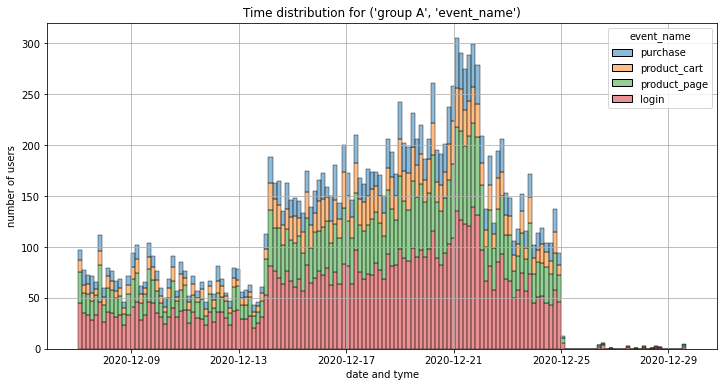

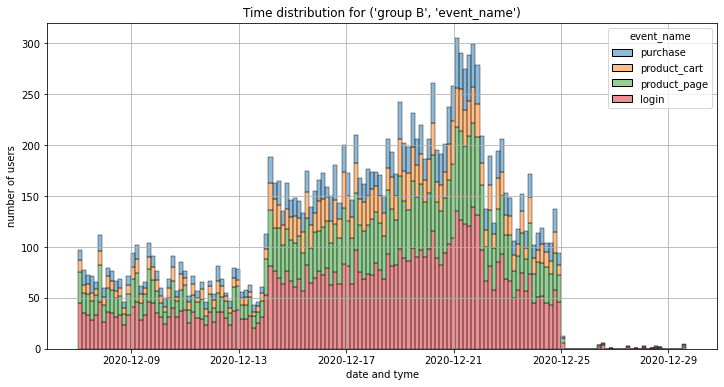

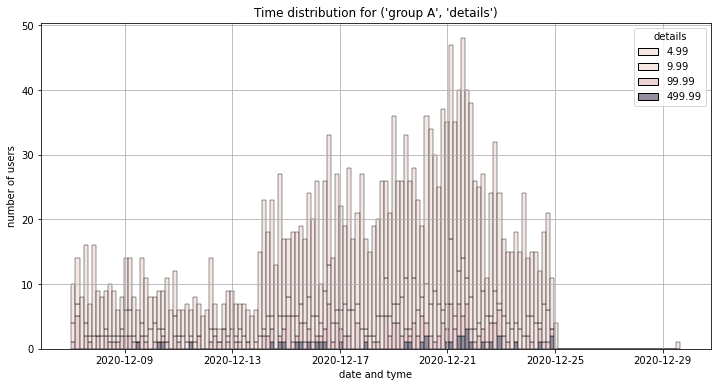

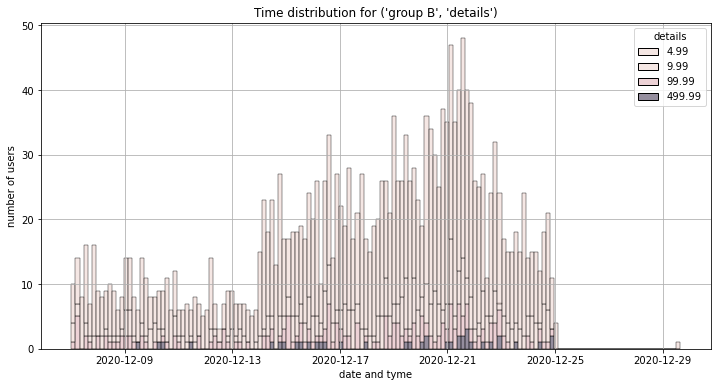

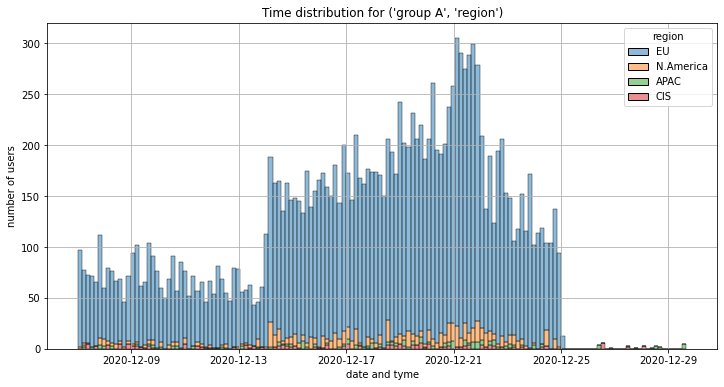

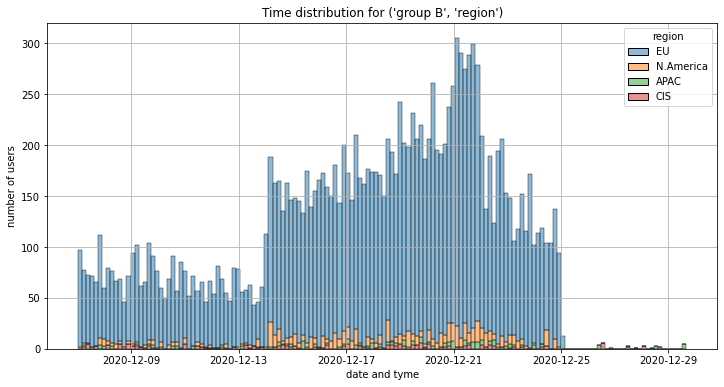

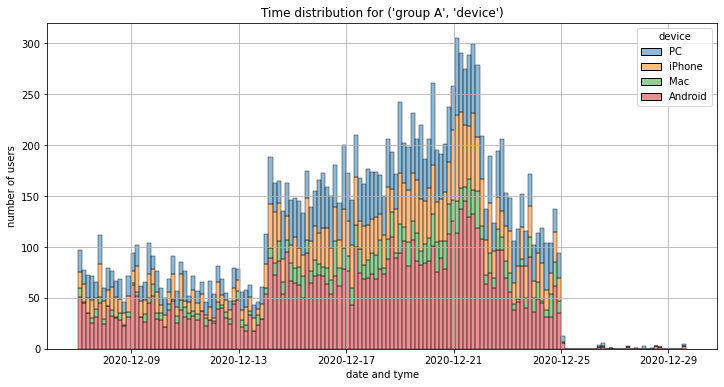

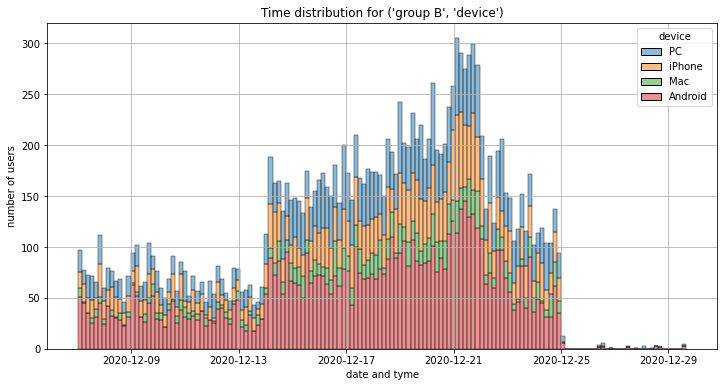

In [460]:
plot_distribution_all(data_to_plot)

For groups A and B we observe approximately equal distribution of purchases by amounts between groups. For both groups before December 14, 2020 user activity was lower than after that date, and after December 25 there is almost no activity at all. On December 25 there is no data at all. 

In [461]:
test_final = pd.concat([group_a, group_b])
len(test_final['user_id'].unique())

2788

In [462]:
test_final.head()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,marketing_event,days_since_registration
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC,no events,0
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC,no events,0
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC,no events,0
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC,no events,0
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone,no events,0


#### Let's do a similar study for the interface test

In [463]:
ab_test_interface.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73214 entries, 0 to 73213
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     73214 non-null  object        
 1   group       73214 non-null  object        
 2   ab_test     73214 non-null  object        
 3   event_dt    73214 non-null  datetime64[ns]
 4   event_name  73214 non-null  object        
 5   details     10824 non-null  float64       
 6   first_date  67708 non-null  datetime64[ns]
 7   region      67708 non-null  object        
 8   device      67708 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 5.0+ MB


In [464]:
ab_test_interface = ab_test_interface[ab_test_interface['event_dt'] > ab_test_interface['first_date']]

In [465]:
ab_test_interface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67708 entries, 6 to 73213
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     67708 non-null  object        
 1   group       67708 non-null  object        
 2   ab_test     67708 non-null  object        
 3   event_dt    67708 non-null  datetime64[ns]
 4   event_name  67708 non-null  object        
 5   details     10039 non-null  float64       
 6   first_date  67708 non-null  datetime64[ns]
 7   region      67708 non-null  object        
 8   device      67708 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 5.2+ MB


In [466]:
ab_test_interface['marketing_event'] = 'no events'

In [467]:
def get_event(row):
    start_dates = p_m_events['start_dt']
    end_dates = p_m_events['finish_dt']
    regions = p_m_events['regions'].apply(lambda x: x.split(', '))
    for i in range(len(p_m_events)):
        if start_dates[i] <= row['event_dt'] <= end_dates[i] and row['region'] in regions[i]:
            return p_m_events['name'][i]
    return 'no events'

ab_test_interface['marketing_event'] = ab_test_interface.apply(get_event, axis=1)

In [468]:
ab_test_interface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67708 entries, 6 to 73213
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          67708 non-null  object        
 1   group            67708 non-null  object        
 2   ab_test          67708 non-null  object        
 3   event_dt         67708 non-null  datetime64[ns]
 4   event_name       67708 non-null  object        
 5   details          10039 non-null  float64       
 6   first_date       67708 non-null  datetime64[ns]
 7   region           67708 non-null  object        
 8   device           67708 non-null  object        
 9   marketing_event  67708 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 5.7+ MB


In [469]:
ab_test_interface['marketing_event'].unique()

array(['no events', 'Christmas&New Year Promo'], dtype=object)

In [470]:
ab_test_interface = ab_test_interface.loc[ab_test_interface['marketing_event'] != 'Christmas&New Year Promo']

In [471]:
ab_test_interface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60984 entries, 6 to 73213
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          60984 non-null  object        
 1   group            60984 non-null  object        
 2   ab_test          60984 non-null  object        
 3   event_dt         60984 non-null  datetime64[ns]
 4   event_name       60984 non-null  object        
 5   details          9034 non-null   float64       
 6   first_date       60984 non-null  datetime64[ns]
 7   region           60984 non-null  object        
 8   device           60984 non-null  object        
 9   marketing_event  60984 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 5.1+ MB


In [472]:
ab_test_interface.isna().sum()

user_id                0
group                  0
ab_test                0
event_dt               0
event_name             0
details            51950
first_date             0
region                 0
device                 0
marketing_event        0
dtype: int64

In [473]:
ab_test_interface.head()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,marketing_event
6,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21 21:07:21,product_page,NaN,2020-12-21,EU,PC,no events
8,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21 21:07:18,login,NaN,2020-12-21,EU,PC,no events
12,4BA448BCE1343C6F,A,interface_eu_test,2020-12-13 22:03:01,product_page,NaN,2020-12-13,EU,Android,no events
13,4BA448BCE1343C6F,A,interface_eu_test,2020-12-20 13:30:53,product_page,NaN,2020-12-13,EU,Android,no events
14,4BA448BCE1343C6F,A,interface_eu_test,2020-12-23 09:31:18,product_page,NaN,2020-12-13,EU,Android,no events


In [502]:
ab_test_interface['days_since_registration'] = (ab_test_interface['event_dt'] - ab_test_interface['first_date']).dt.days


In [503]:
ab_test_interface = ab_test_interface[ab_test_interface['days_since_registration'] <= 14]

In [504]:
# Function for generating a table
def event_group_pivot_interface(group):
    result = (ab_test_interface
                  .query('group == @group')
                  .groupby('event_name')
                  .agg({'user_id':'nunique'})
                  .reset_index()
                  .sort_values(by='user_id', ascending=False)
                  .reset_index(drop=True)
             )
    return result

def event_group_ratio_interface(df):
    df['ratio'] = round((df['user_id'] / len(ab_test_interface['user_id'].unique())),3)
    df['success'] = df['user_id'].shift(periods=1, axis=0, fill_value=df['user_id'][0])
    df['conv'] = round((df['user_id'] / df['success']),3)
# Table for group A
event_A_pivot_interface = event_group_pivot_interface('A')
event_group_ratio_interface(event_A_pivot_interface)
event_A_pivot_interface.columns = ['event_name', 'A', 'A_ratio', 'A_success', 'A_conv']
# Table for group B
event_B_pivot_interface = event_group_pivot_interface('B')
event_group_ratio_interface(event_B_pivot_interface)
event_B_pivot_interface.columns = ['event_name', 'B', 'B_ratio', 'B_success', 'B_conv']

# Combining tables
event_group_pivot_interface = event_A_pivot_interface.merge(event_B_pivot_interface, on='event_name')
event_group_pivot_interface.drop(['A_success', 'B_success'], axis=1, inplace=True)
event_group_pivot_interface

,event_name,A,A_ratio,A_conv,B,B_ratio,B_conv
0,login,4520,0.505,1.000,4438,0.495,1.000
1,product_page,3030,0.338,0.670,2913,0.325,0.656
2,purchase,1612,0.180,0.532,1479,0.165,0.976
3,product_cart,1479,0.165,0.917,1516,0.169,0.520


In [505]:
fig = go.Figure(go.Funnel(
    name='A',
    y = event_group_pivot_interface['event_name'],
    x = event_group_pivot_interface['A'],
    textinfo = 'value+percent initial'))

fig.add_trace(go.Funnel(
    name='B',
    y = event_group_pivot_interface['event_name'],
    x = event_group_pivot_interface['B'],
    textinfo = 'value+percent initial'))

fig.update_layout(template='seaborn',
                  title='<b>Funnel of events by test groups</b>')

fig.show()

In [478]:
group_a_interface = ab_test_interface.query('group == "A"')
len(group_a_interface['user_id'].unique())

4521

In [479]:
group_b_interface = ab_test_interface.query('group == "B"')
len(group_b_interface['user_id'].unique())

4438

In [482]:
data_to_plot = [{'df': ab_test_interface, 'name': 'A', 'column': 'event_name', 'title': 'event_name'},
                {'df': ab_test_interface, 'name': 'B', 'column': 'event_name', 'title': 'event_name'},
                {'df': ab_test_interface, 'name': 'A', 'column': 'details', 'title': 'details'},
                {'df': ab_test_interface, 'name': 'B', 'column': 'details', 'title': 'details'},
                {'df': ab_test_interface, 'name': 'A', 'column': 'region', 'title': 'region'},
                {'df': ab_test_interface, 'name': 'B', 'column': 'region', 'title': 'region'},
                {'df': ab_test_interface, 'name': 'A', 'column': 'device', 'title': 'device'},
                {'df': ab_test_interface, 'name': 'B', 'column': 'device', 'title': 'device'}]
group_a,'группы A','event_name'
def plot_distribution_all(data_to_plot):
    for data in data_to_plot:
        fig, ax = plt.subplots(figsize=(12,6))
        plt.title(f'Time distribution for {data["name"],data["title"]}')
        plt.xlabel('date and tyme')
        plt.ylabel('number of users')
        sns.histplot(data=data["df"], x='event_dt', hue=data["column"], multiple='stack', bins=150, alpha=0.5, 
                     legend=True)
        ax.grid(True)
        xax = ax.xaxis
        xax.get_label().set_visible(True)
        plt.show()

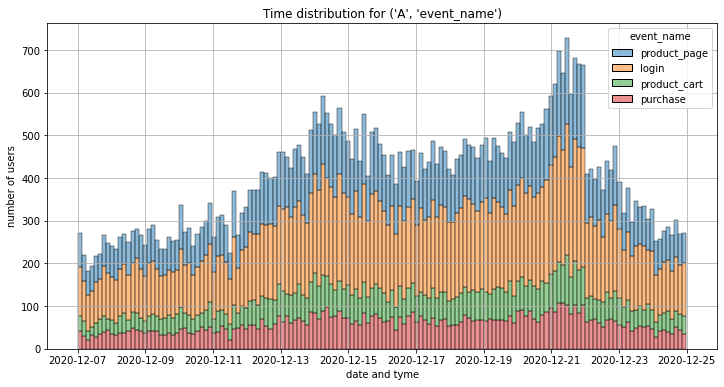

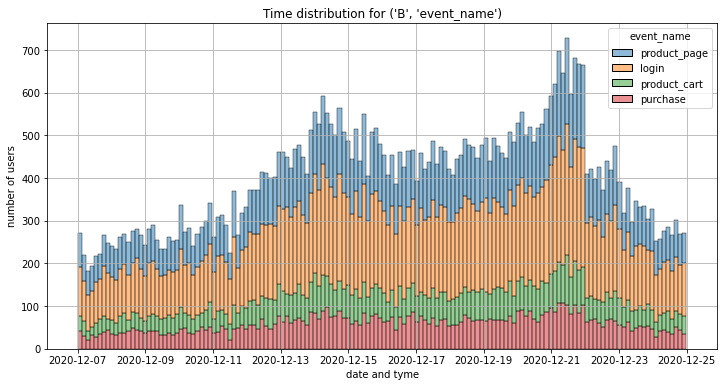

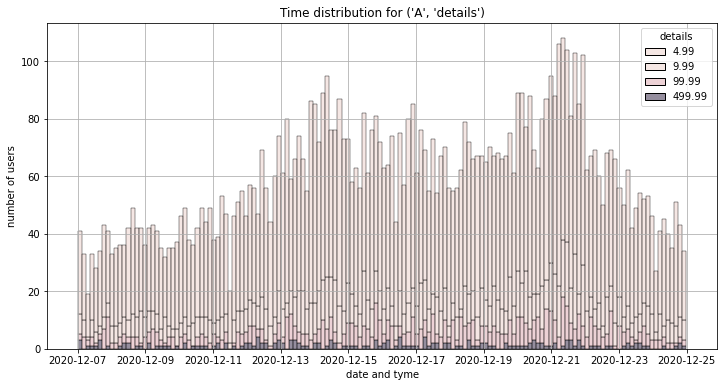

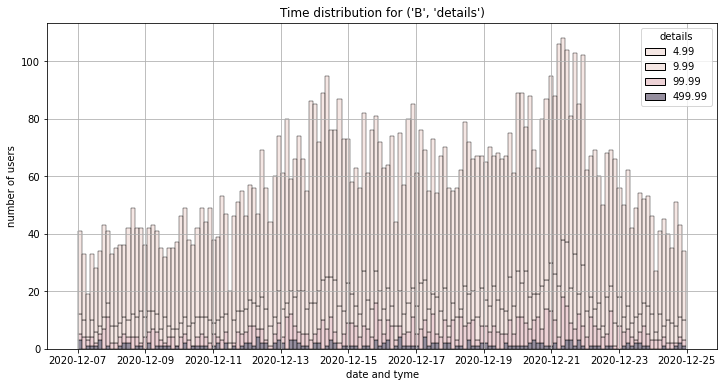

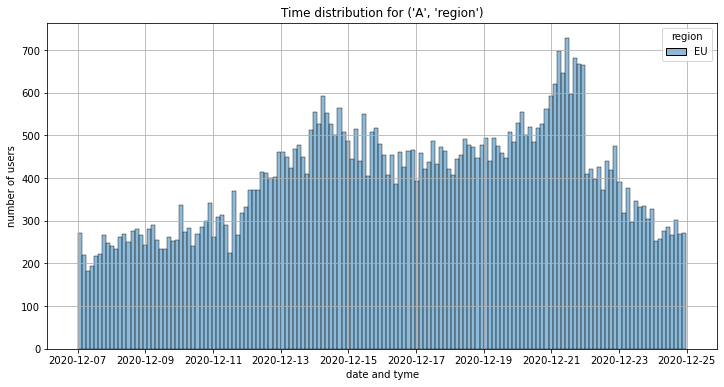

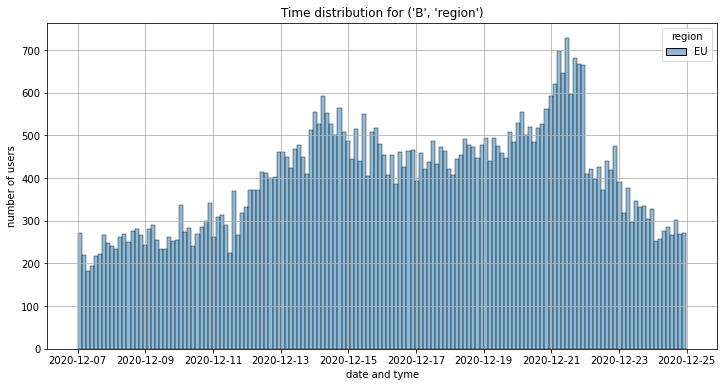

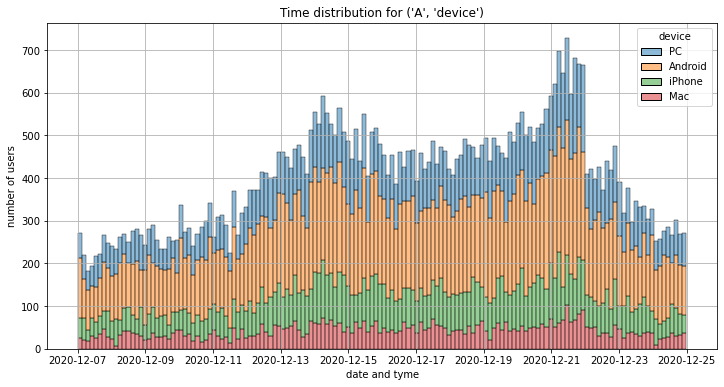

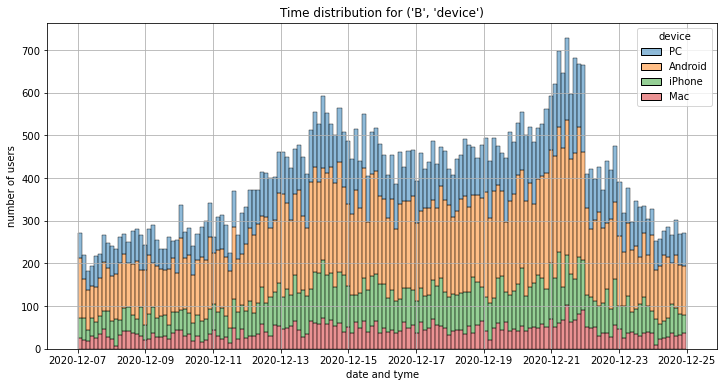

In [483]:
plot_distribution_all(data_to_plot)

In general, the ab_test_interface data is much more suitable for the conditions of the task:
1. the number of participants between the groups is about the same
2. the number of test participants, although higher than 6000, is not less, as in the case of the recommended one.
3. Only European users are present
 - ONCE
- the data are cut off on the 25th of December. maybe there was a failure during the launch of the promo and the data were lost. 

In [484]:
test_final_interface = pd.concat([group_a_interface, group_b_interface])
len(test_final_interface['user_id'].unique())

8959

In [485]:
test_final_interface.head()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,marketing_event,days_since_registration
6,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21 21:07:21,product_page,NaN,2020-12-21,EU,PC,no events,0
8,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21 21:07:18,login,NaN,2020-12-21,EU,PC,no events,0
12,4BA448BCE1343C6F,A,interface_eu_test,2020-12-13 22:03:01,product_page,NaN,2020-12-13,EU,Android,no events,0
13,4BA448BCE1343C6F,A,interface_eu_test,2020-12-20 13:30:53,product_page,NaN,2020-12-13,EU,Android,no events,7
14,4BA448BCE1343C6F,A,interface_eu_test,2020-12-23 09:31:18,product_page,NaN,2020-12-13,EU,Android,no events,10


In [486]:
test_final_interface['group'].value_counts()

A    30768
B    29642
Name: group, dtype: int64

# Let's actually investigate common routes of users on the website.
## AB TEST RECOMENDATED


In [487]:


sorted_data = test_final.sort_values(by=['user_id', 'event_dt'])
sorted_data.tail()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,marketing_event,days_since_registration
15026,FFAE9489C76F352B,A,recommender_system_test,2020-12-13 18:46:06,product_page,NaN,2020-12-13,EU,Mac,no events,0
15030,FFAE9489C76F352B,A,recommender_system_test,2020-12-15 20:14:51,login,NaN,2020-12-13,EU,Mac,no events,2
15027,FFAE9489C76F352B,A,recommender_system_test,2020-12-15 20:14:55,product_page,NaN,2020-12-13,EU,Mac,no events,2
15031,FFAE9489C76F352B,A,recommender_system_test,2020-12-19 11:32:50,login,NaN,2020-12-13,EU,Mac,no events,6
15028,FFAE9489C76F352B,A,recommender_system_test,2020-12-19 11:32:51,product_page,NaN,2020-12-13,EU,Mac,no events,6


In [488]:
#a function for determining user's path
def sample(user):
    sorted_user=sorted_data[sorted_data['user_id']==user].sort_values(by=['user_id','event_dt'])
    return sorted_user['event_name'].drop_duplicates().to_list()

In [489]:
sample('FFAE9489C76F352B')

['login', 'product_page']

In [490]:
sample_list = []
for i in sorted_data['user_id'].unique():
    sample_list.append([i, str(sample(i))])

In [491]:
sample_data = pd.DataFrame(sample_list, columns=['user_id', 'sequence'])
sample_data.head()

,user_id,sequence
0,0010A1C096941592,"['purchase', 'product_page', 'login']"
1,003DF44D7589BBD4,"['product_cart', 'product_page', 'login']"
2,00505E15A9D81546,['login']
3,005E096DBD379BCF,"['purchase', 'login']"
4,006E3E4E232CE760,"['login', 'product_page']"


In [492]:
top_paths = sample_data['sequence'].value_counts().reset_index()

In [493]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
top_paths

,index,sequence
0,['login'],552
1,"['login', 'product_page']",461
2,"['product_page', 'login']",371
3,"['purchase', 'login', 'product_page']",227
4,"['purchase', 'login']",175
5,"['purchase', 'product_page', 'login']",173
6,"['login', 'product_cart']",116
7,"['login', 'product_cart', 'product_page']",95
8,"['product_cart', 'login']",89
9,"['product_cart', 'product_page', 'login']",85


Let's get this straight:
1. 552 people-most did only one thing, and did not get past login. perhaps the reason is a technical problem or too complicated way of authorization
2. 461 people- completed authorization and got through to product_page, but didn't proceed with the purchase.
3. 371 people - first appeared on the product_page and then passed to the login page, but didn't finish (probably, the problem is still a technical inconsistency)
5. An absolute majority of the clients (525) were at first on the Purchase page and only then on the other pages. 
6. From all of the above, we can already conclude that the results of the test can not be accepted. But more about that a little later. For now we will notice a very strange behavior of users, which is probably caused by technical problems or other reasons. 

# intermediate outputs for AB TEST RECOMENDATED:
1. Do the types need to be converted? - we converted the types of all columns where needed
2. Are there any missing or repeating values? If so, how would you characterize them? - we dealt with the missing and duplicate values and cleaned up the data
3. examine conversion rates at different stages of the funnel. - Of the 2,082 participants in Group A, only 1,360 moved on to the next product_page stage, which is 65% of the total. 652 participants moved on to the Purchasing stage, which is only 48% of the previous stage. And finally 631 people made it to the final stage,which is 97 percent of the previous stage. In group B we see a similar picture: 705(100%)--397(56%)-198(49%)--195(99%). Thus we see that the greatest conversion occurs from the first to the second stage. Perhaps the matter is a technical problem with the site on the login stage. 
Also we see some strange result, when there are more people, who have come to buy, than to cart, which is strange, but understandable. Perhaps the thing is that those few people who have completed the purchase, bypassing the shopping cart, came by a special banner, or a direct button "buy", unfortunately we can not find out this in detail. so we understand that the conversion at any stage does not meet the test task (10% increase at each stage). We will still try to confirm or refute this conclusion at the stage of statistical hypotheses
5. Is the number of events per user evenly distributed among the samples? - No, not evenly, there are much more participants in the group A. 
6. Are there users present in both samples? - checked, found, and excluded
7. How is the number of events distributed by day? - After December 25 there were almost no events for both groups, which is understandable, because it is the Christmas vacations, all the gifts have already been bought. December 25, all day there were no events at all, which is strange, maybe there was a technical failure and the data were not saved (were not downloaded / lost). 
8. 8. Are there any peculiarities in the data that you should consider before starting A/B testing? - Apart from the relatively uneven groups, we were able to deal with all the peculiarities. 
	event_name	A	A_ratio	A_conv	B	B_ratio	B_conv


- Let's do a similar study for the interface test

In [494]:
fig = go.Figure(go.Funnel(
    name='A',
    y = event_group_pivot_interface['event_name'],
    x = event_group_pivot_interface['A'],
    textinfo = 'value+percent initial'))

fig.add_trace(go.Funnel(
    name='B',
    y = event_group_pivot_interface['event_name'],
    x = event_group_pivot_interface['B'],
    textinfo = 'value+percent initial'))

fig.update_layout(template='seaborn',
                  title='<b>Funnel of events by test groups</b>')

fig.show()

In [495]:
#Let's actually investigate common routes of users on the website.

sorted_data_interface = test_final_interface.sort_values(by=['user_id', 'event_dt'])
sorted_data_interface.tail()

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,marketing_event,days_since_registration
71902,FFEFC0E55C1CCD4F,B,interface_eu_test,2020-12-17 18:04:40,login,NaN,2020-12-13,EU,PC,no events,4
71903,FFEFC0E55C1CCD4F,B,interface_eu_test,2020-12-20 22:11:36,login,NaN,2020-12-13,EU,PC,no events,7
62739,FFF58BC33966EB51,B,interface_eu_test,2020-12-13 17:55:19,login,NaN,2020-12-13,EU,Android,no events,0
62740,FFF58BC33966EB51,B,interface_eu_test,2020-12-15 04:48:35,login,NaN,2020-12-13,EU,Android,no events,2
62741,FFF58BC33966EB51,B,interface_eu_test,2020-12-17 03:19:16,login,NaN,2020-12-13,EU,Android,no events,4


In [496]:
#a function for determining user's path
def sample_interface(user):
    sorted_user=sorted_data_interface[sorted_data_interface['user_id']==user].sort_values(by=['user_id','event_dt'])
    return sorted_user['event_name'].drop_duplicates().to_list()

In [497]:
sample_interface('FFE600EEC4BA7685')

['login', 'product_cart', 'product_page']

In [498]:
sample_interface_list = []
for i in sorted_data_interface['user_id'].unique():
    sample_interface_list.append([i, str(sample_interface(i))])

In [499]:
sequence_interface_data = pd.DataFrame(sample_interface_list, columns=['user_id', 'sequence'])
sequence_interface_data.tail()

,user_id,sequence
8954,FFDC1BEFD27A66D5,['login']
8955,FFE5B14BD55C1C5C,"['login', 'product_cart']"
8956,FFE600EEC4BA7685,"['login', 'product_cart', 'product_page']"
8957,FFEFC0E55C1CCD4F,['login']
8958,FFF58BC33966EB51,['login']


In [500]:
top_paths_int = sequence_interface_data['sequence'].value_counts().reset_index()

In [501]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
top_paths_int

,index,sequence
0,"['login', 'product_page']",1481
1,['login'],1329
2,"['product_page', 'login']",1069
3,"['purchase', 'login', 'product_page']",794
4,"['purchase', 'login']",655
5,"['purchase', 'product_page', 'login']",613
6,"['login', 'product_cart']",392
7,"['login', 'product_cart', 'product_page']",363
8,"['product_cart', 'product_page', 'login']",336
9,"['product_cart', 'login']",296


Let us analyze the last table:
1. 730 people were authorized and came to the page product_page, and then did not continue. (Basically a normal situation, a lot of people did not continue to the purchase, perhaps there is a technical problem)
2. 635 - could not or did not want to go further authorization, but then we see many more users with different paths, who stopped at authorization. We need to check, maybe there is a technical problem. 
3. The vast majority of users made a purchase first and then went on to other pages. Perhaps there is an advertising banner with the button "buy now", clicking on it, you can go straight to the purchase, bypassing the other stages. This may also explain why there are more people at the "buy" stage of the funnel than at the "cart" stage.
4. From all of the above it can already be concluded that the results of the test cannot be accepted. But more on that later. For now we notice a very strange behavior of users, which is probably caused by technical problems or other reasons. 

# intermediate conclusions for Interface:
1. we have converted all column types where needed
2. we've dealt with skips and duplicates and cleaned up the data
3. study the conversion rates at different stages of the funnel. - Of the 4,521 participants in Group A, only 3,031 went to the next product_page stage, which is 67% of the total. 1,612 participants went to the Purchasing stage, which is only 53% of the previous stage. And finally 1,479 (91%) people made it to the final stage. In group B a  picture is: 4439(100%)-2914(66%)-1479(50%)-1516(102%),so we see that the test conditions (10% increase at each stage of conversion) are confirmed only for the product_cart cart. alSo we see that the highest conversion happens from the  product_page  stage to the purchase stage, about 50%, which is a lot. Maybe it's a technical problem with the site or irrelevant offers. 
4. we also see a slightly odd result where there are more people reaching the purchase stage than the product cart, which is odd but understandable. Perhaps the thing is that those few people who have completed the purchase, bypassing the basket of goods, came by a special banner, or by a direct button "buy", unfortunately. we can not find out this thoroughly. 
5. participants are distributed roughly equally between groups A and B. 
6. Are there users present in both samples? - checked, found and excluded
7. How is the number of events distributed by day? - After December 25 there is no data at all. Maybe it was lost at the beginning of the promo, and there was no one to fix it because of the Christmas vacations. 


Let's formulate hypotheses for both tests

- H0: The null hypothesis: There is no statistically significant differnce 
- H1: The alternative hypothesis: There is statistically significant differnce 

RECOMENDED TEST

In [506]:
pivot = test_final.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique').reset_index()

pivot

group,event_name,A,B
0,login,2082,705
1,product_cart,631,195
2,product_page,1360,397
3,purchase,652,198


In [507]:
def check_hypothesis(group1,group2,event,alpha=0.05):
    success1=pivot[pivot.event_name==event][group1].iloc[0]
    success2=pivot[pivot.event_name==event][group2].iloc[0]
    
    trials1=test_final[test_final.group==group1]['user_id'].nunique()
    trials2=test_final[test_final.group==group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = success1/trials1

    # success proportion in the second group:
    p2 = success2/trials2

    # success proportion in the combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1,group2 )

In [508]:
check_hypothesis('A','B','login',alpha=0.05)

p-value:  0.08587401754779211
Failed to reject the null hypothesis for login and groups A B


проверим все тесты

In [509]:
for i in pivot.event_name.unique():
    check_hypothesis('A','B',i,alpha=0.05)

p-value:  0.08587401754779211
Failed to reject the null hypothesis for login and groups A B
p-value:  0.1766337419130104
Failed to reject the null hypothesis for product_cart and groups A B
p-value:  1.5371909704686715e-05
Rejecting the null hypothesis for product_page and groups A B
p-value:  0.10281767567786759
Failed to reject the null hypothesis for purchase and groups A B


We performed a total of 2 tests (2 comparisons of 2 in each). Given the Bonféonni correction, we calculate the level of significance as Alpha = 0.05 \ 4 = 0.0125 and apply it to our hypothesis

In [510]:
for i in pivot.event_name.unique():
    check_hypothesis('A','B',i,alpha=0.0125)

p-value:  0.08587401754779211
Failed to reject the null hypothesis for login and groups A B
p-value:  0.1766337419130104
Failed to reject the null hypothesis for product_cart and groups A B
p-value:  1.5371909704686715e-05
Rejecting the null hypothesis for product_page and groups A B
p-value:  0.10281767567786759
Failed to reject the null hypothesis for purchase and groups A B


Using Bonféonni's correction we have the following result:
   1. we cannot disprove the null theory that there is no statistically significant difference at the login stage
   2. we cannot disprove the null theory that there is no statistically significant difference at the product_cart stage 
   3. we can disprove the null theory that there is no statistically significant difference at the product_page stage 
   4. we cannot disprove the null theory that there is no statistically significant difference at the purchase stage 

## interface


In [511]:
pivot_int = test_final_interface.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique').reset_index()

pivot_int

group,event_name,A,B
0,login,4520,4438
1,product_cart,1479,1516
2,product_page,3030,2913
3,purchase,1612,1479


In [512]:
def check_hypothesis(group1,group2,event,alpha=0.05):
    success1=pivot_int[pivot_int.event_name==event][group1].iloc[0]
    success2=pivot_int[pivot_int.event_name==event][group2].iloc[0]
    
    trials1=test_final_interface[test_final_interface.group==group1]['user_id'].nunique()
    trials2=test_final_interface[test_final_interface.group==group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = success1/trials1

    # success proportion in the second group:
    p2 = success2/trials2

    # success proportion in the combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1,group2 )

In [513]:
check_hypothesis('A','B','login',alpha=0.05)

p-value:  0.321766940707354
Failed to reject the null hypothesis for login and groups A B


In [514]:
for i in pivot_int.event_name.unique():
    check_hypothesis('A','B',i,alpha=0.05)

p-value:  0.321766940707354
Failed to reject the null hypothesis for login and groups A B
p-value:  0.14702821950355438
Failed to reject the null hypothesis for product_cart and groups A B
p-value:  0.16608962447812559
Failed to reject the null hypothesis for product_page and groups A B
p-value:  0.02036540675054077
Rejecting the null hypothesis for purchase and groups A B


In [515]:
for i in pivot_int.event_name.unique():
    check_hypothesis('A','B',i,alpha=0.0125)

p-value:  0.321766940707354
Failed to reject the null hypothesis for login and groups A B
p-value:  0.14702821950355438
Failed to reject the null hypothesis for product_cart and groups A B
p-value:  0.16608962447812559
Failed to reject the null hypothesis for product_page and groups A B
p-value:  0.02036540675054077
Failed to reject the null hypothesis for purchase and groups A B


Using Bonféonni's correction we have the following result:
   1. we cannot reject  the null theory that there is no statistically significant difference at the login stage
   2. we cannot reject  the null theory that there is no statistically significant difference at the product_cart stage 
   3. we can reject  the null theory that there is no statistically significant difference at the product_page stage 
   4. we cannot reject  the null theory that there is no statistically significant difference at the purchase stage 

# CONCLUSION AND RECOMMENDATIONS

In studying the data, we saw that two tests were taken at the same time. The one that was recommended by the conditions of the problem had many disadvantages
## recommender_system_test
1. unequally distributed participants between groups
2. Far fewer participants than needed 
3. Many other inconsistencies in the data, such as different regions, inconsistency of test dates...
4. All data for Dec 25th was lost or not collected. Maybe there was a technical failure
5. We found that there was a Christmas&New Year Promo during the study period. Since the promotion can greatly influence the results of the test, I decided to exclude users who participated in this promotion. 
6. We also saw a sharp decrease in activity of users after December 25th, which is quite explainable, because it is Christmas and most of the purchases and gifts are done before holidays.  
7. After December, 14 there is inexplicable (at this point) strong jump upwards in the activity of users. 
8. Having plotted the funnels and compared the conversion at each stage of the funnel I came to the conclusion that at neither stage conversion did not meet the conditions of the test (10% increase in conversion in group B)
9. having made a zero hypothesis and tested the AB test using Bonferoni correction, I was convinced of my original conclusion that there is no appreciable statistical difference between the groups at any stage. 
## interface_eu_test. 
1. The participants are distributed fairly evenly among the groups, almost perfectly
2. Many more participants than needed. 
3. The data end on December 25. Although the problem is to end on January 1. 
6. There are two peaks of user activity - on December 14 and 22.  
8. Having built funnels and compared conversion at each stage of the funnel I came to a conclusion that only at one stage (transition from purchase to shopping cart) conversion corresponds to test conditions (10% increase of conversion in group B), but it needs to be confirmed by statistical hypotheses. 
9. Having made zero hypotheses and tested AB test with Bonferoni correction, I came to conclusion that there is no significant statistical difference between groups at any stage.
### RECOMMENDATIONS.
1. Neither of the two tests can be trusted for the reasons given above. I recommend running the test from the beginning, correcting all the errors of the previous one. 